# **Business Case: Walmart - Confidence Interval and CLT**

## **Business Problem:**
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
## **Dataset:**
The company collected the transactional data of customers who purchased products from the Walmart Stores. The dataset has the following features:


|**Variable**    |**Description**       |
|:--------------|:-------------------|
|User_ID:| 	User ID|
|Product_ID:| 	Product ID
|Gender:| 	Sex of User
|Age:| 	Age in bins
|Occupation:| 	Occupation(Masked)
|City_Category:| 	Category of the City (A,B,C)
|StayInCurrentCityYears:| 	Number of years stay in current city
|Marital_Status:| 	Marital Status
|ProductCategory:| 	Product Category (Masked)
|Purchase:| 	Purchase Amount 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
sns.set_theme(style="darkgrid")
from scipy.stats import t
from tabulate import tabulate

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


***
***
## **1. Analyzing Basic Metrics.**

In [4]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}",'\n')
print(df.info())

Number of rows: 550,068 
Number of columns: 10 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


**Changing the data types of - Occupation, Marital_Status, Product_Category**

In [5]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [6]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [7]:
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [8]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


#### Observations
- There are no missing values in the dataset.
- Purchase amount might have outliers.

***
***
## **2. Missing Value & Outlier Detection.**

### 2.1 Missing Value

In [9]:
# checking null values
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

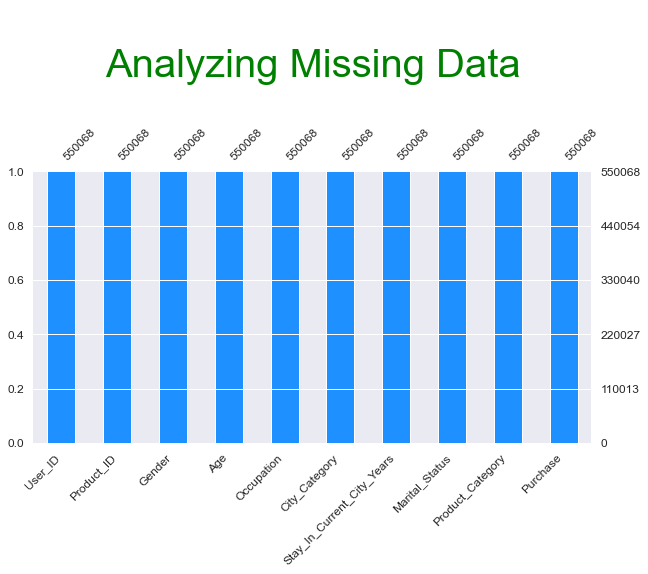

In [10]:
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

In [11]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


### 2.2 Outliers Detection

In [12]:
#df1.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

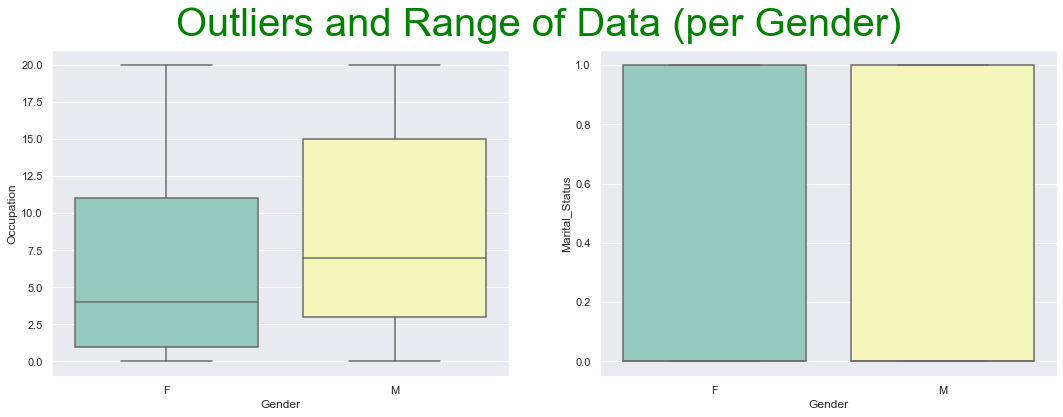

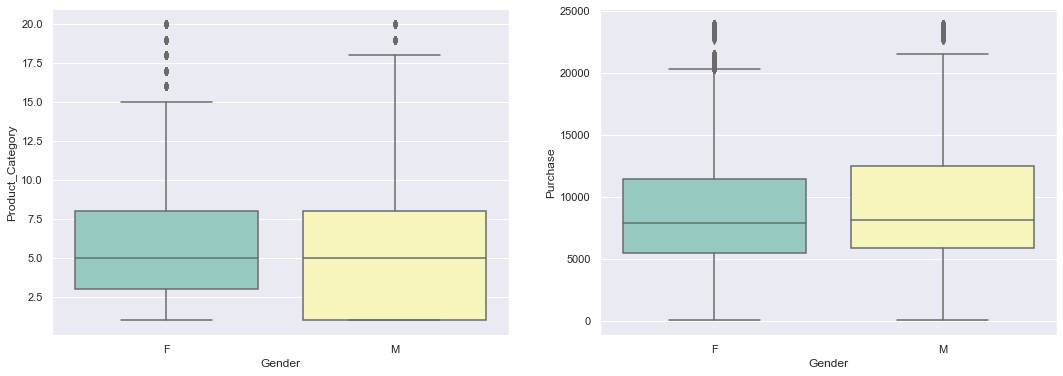

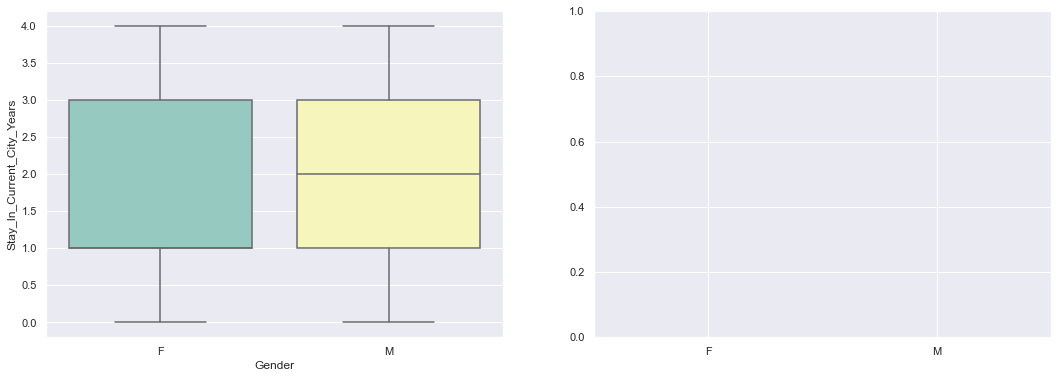

In [13]:
for col, r, c in [['Occupation', 0, 0], ['Marital_Status', 0, 1], ['Product_Category', 1, 0], ['Purchase', 1, 1], ['Stay_In_Current_City_Years', 2, 0]]:
    if c == 0:
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    sns.boxplot(data=df, y=col, ax=axes[c], x='Gender',palette='Set3')
    if c == 1:
        if r == 0:
            fig.suptitle("Outliers and Range of Data (per Gender)", fontsize=40, color="green")
        plt.show()

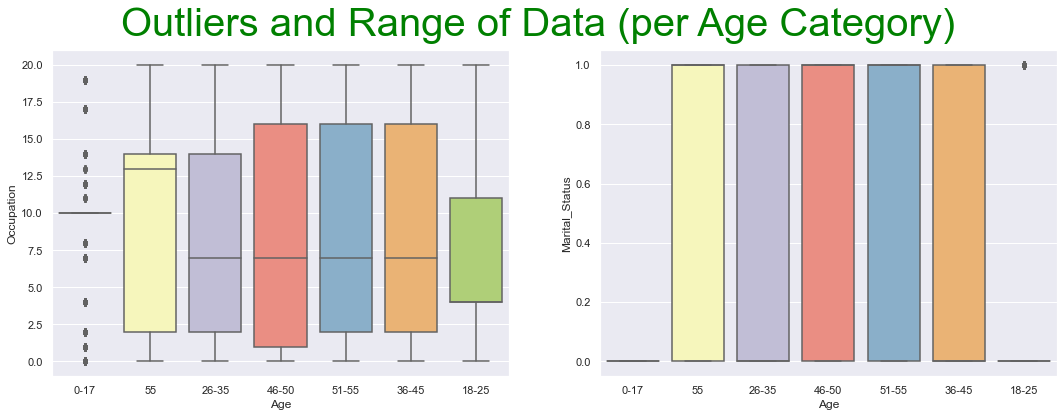

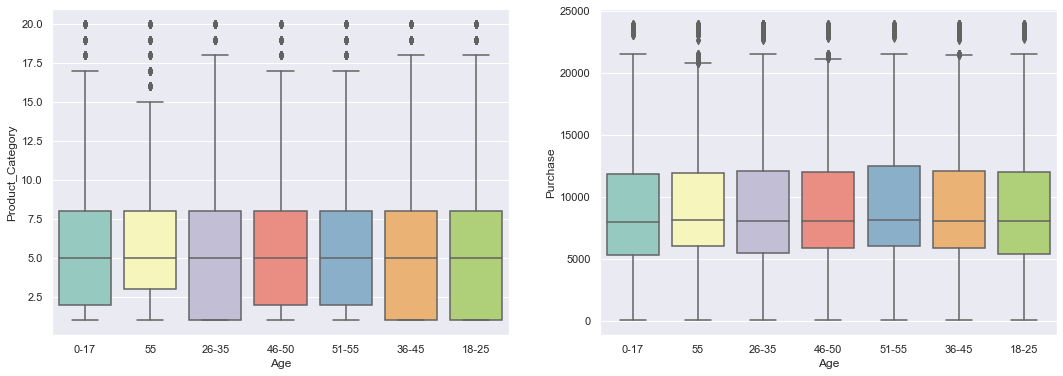

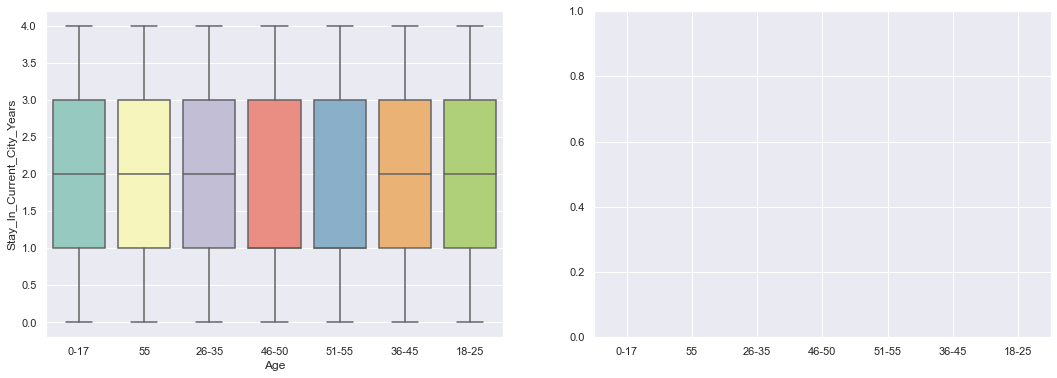

In [14]:
for col, r, c in [['Occupation', 0, 0], ['Marital_Status', 0, 1], ['Product_Category', 1, 0], ['Purchase', 1, 1], ['Stay_In_Current_City_Years', 2, 0]]:
    if c == 0:
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    sns.boxplot(data=df, y=col, ax=axes[c], x='Age',palette='Set3')
    if c == 1:
        if r == 0:
            fig.suptitle("Outliers and Range of Data (per Age Category)", fontsize=40, color="green")
        plt.show()

***
***
## **3. Value Counts and Unique Attributes.**

In [15]:
df.columns
# Finding Unique values from all columns in dataset
print("\nTotal unique values", end ='\n\n')
df_dict = {}
col = []
total_count = []
for i in df.columns:
    col.append(i)
    total_count.append(df[i].nunique())
df_dict = {'Column Names':col, 'Total count of Unique records':total_count}
print(tabulate(df_dict, headers='keys', tablefmt='fancy_grid',showindex =range(1,df.shape[1]+1)))


Total unique values

╒════╤════════════════════════════╤═════════════════════════════════╕
│    │ Column Names               │   Total count of Unique records │
╞════╪════════════════════════════╪═════════════════════════════════╡
│  1 │ User_ID                    │                            5891 │
├────┼────────────────────────────┼─────────────────────────────────┤
│  2 │ Product_ID                 │                            3631 │
├────┼────────────────────────────┼─────────────────────────────────┤
│  3 │ Gender                     │                               2 │
├────┼────────────────────────────┼─────────────────────────────────┤
│  4 │ Age                        │                               7 │
├────┼────────────────────────────┼─────────────────────────────────┤
│  5 │ Occupation                 │                              21 │
├────┼────────────────────────────┼─────────────────────────────────┤
│  6 │ City_Category              │                               3 

In [16]:
for i in df.columns:
    print("\nTotal unique values for",'\033[1m'+str(i)+'\033[0m', end ='\n\n')
    print(df[i].value_counts().reset_index())
    print()


Total unique values for User_ID

        index  User_ID
0     1001680     1026
1     1004277      979
2     1001941      898
3     1001181      862
4     1000889      823
...       ...      ...
5886  1002690        7
5887  1002111        7
5888  1005810        7
5889  1004991        7
5890  1000708        6

[5891 rows x 2 columns]


Total unique values for Product_ID

          index  Product_ID
0     P00265242        1880
1     P00025442        1615
2     P00110742        1612
3     P00112142        1562
4     P00057642        1470
...         ...         ...
3626  P00314842           1
3627  P00298842           1
3628  P00231642           1
3629  P00204442           1
3630  P00066342           1

[3631 rows x 2 columns]


Total unique values for Gender

  index  Gender
0     M  414259
1     F  135809


Total unique values for Age

   index     Age
0  26-35  219587
1  36-45  110013
2  18-25   99660
3  46-50   45701
4  51-55   38501
5     55   21504
6   0-17   15102


Total unique va

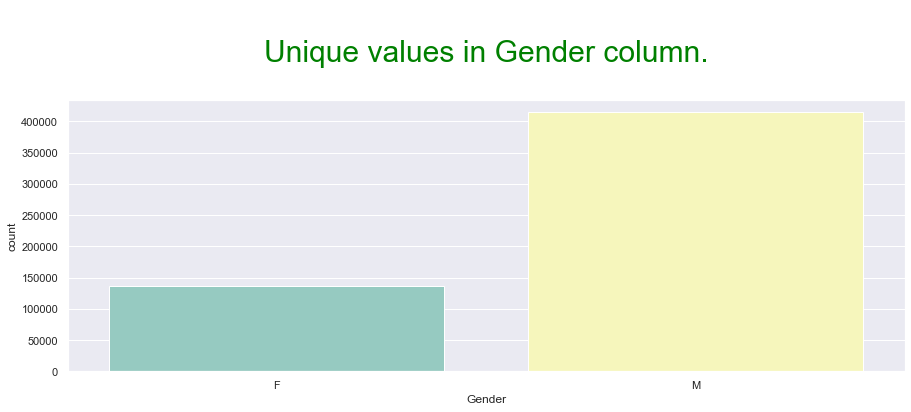

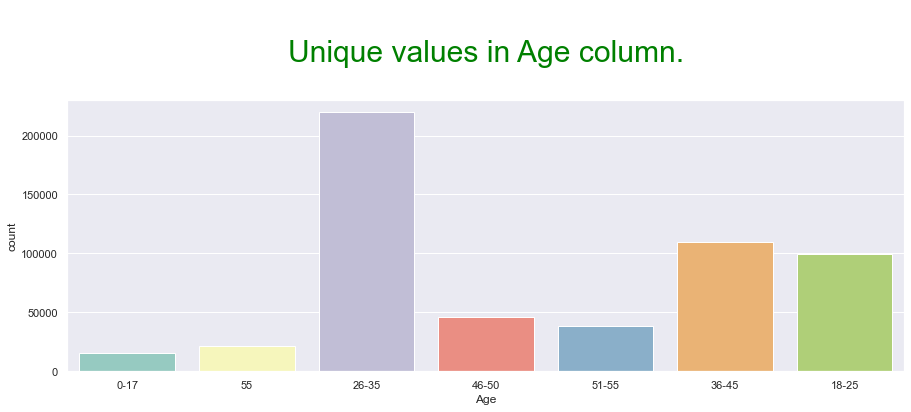

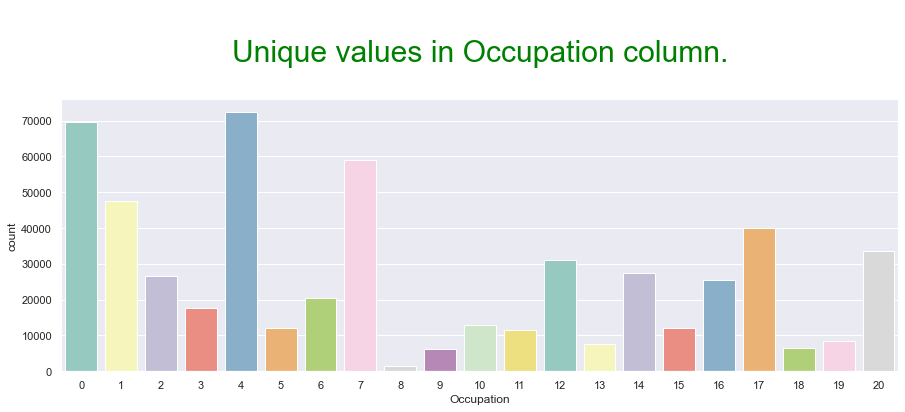

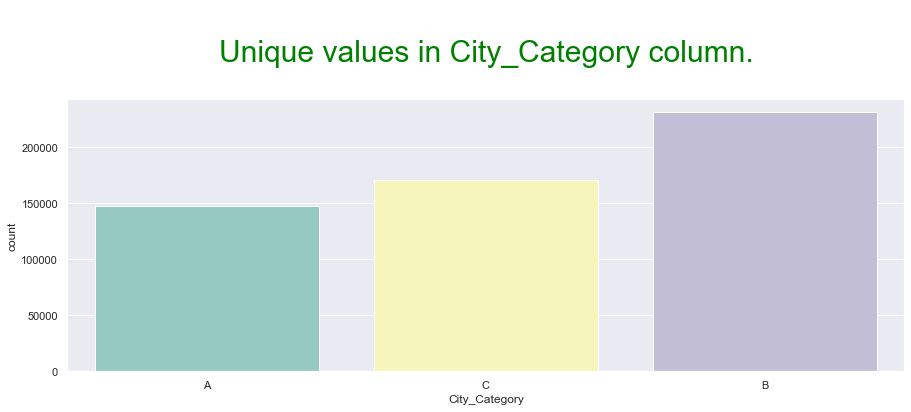

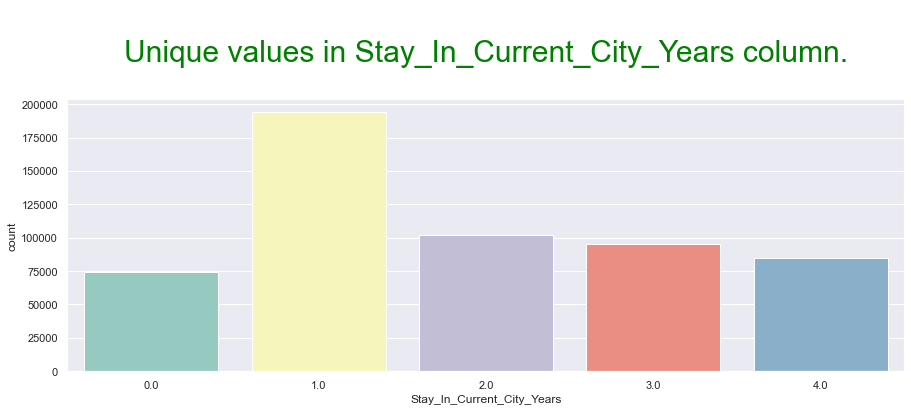

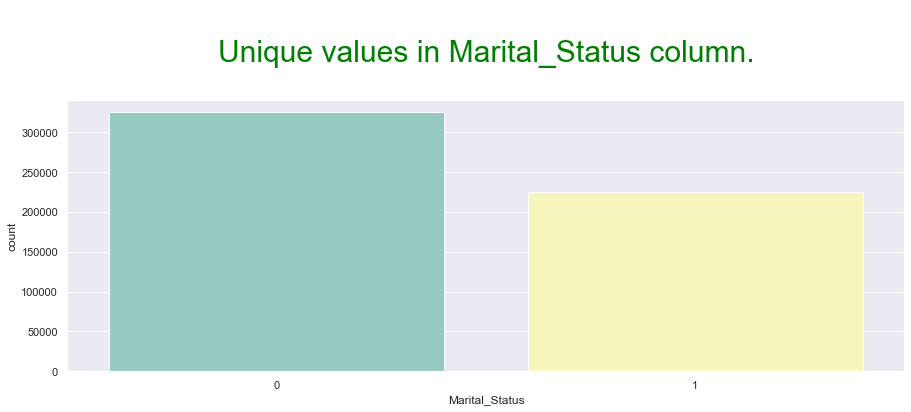

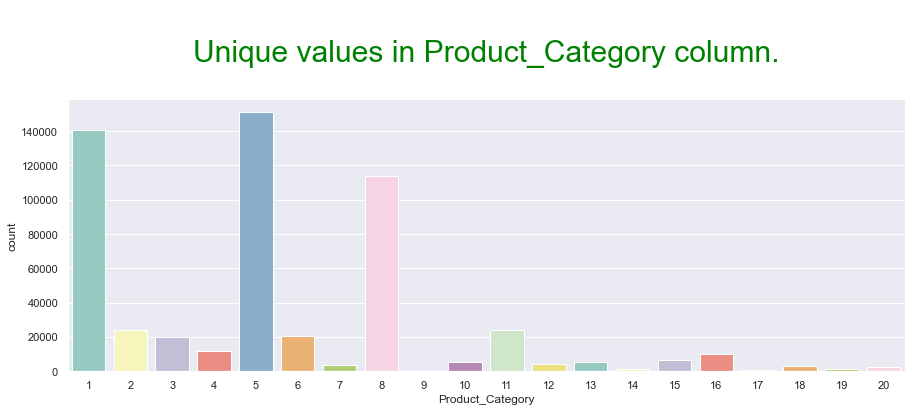

In [17]:
for column in df.columns[2:-1]:
    fig, axes = plt.subplots(figsize=(15,5))
    sns.countplot(data=df, x=column,palette='Set3')
    plt.title(f"\nUnique values in {column} column.\n", fontsize=30, color="green")
    plt.show()

**Value_counts for the following:**
- Age
- City_Category
- Gender
- Marital_Status
- Occupation
- Product_Category
- Stay_In_Current_City_Years

In [18]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()#/len(df)

value
variable                   value        
Age                        0-17    15102
                           18-25   99660
                           26-35  219587
                           36-45  110013
                           46-50   45701
                           51-55   38501
                           55      21504
City_Category              A      147720
                           B      231173
                           C      171175
Gender                     F      135809
                           M      414259
Marital_Status             0      324731
                           1      225337
Occupation                 0       69638
                           1       47426
                           2       26588
                           3       17650
                           4       72308
                           5       12177
                           6       20355
                           7       59133
                           8        1546
                           9        6291
                           10      12930
                           11      11586
                           12      31179
                           13       7728
                           14      27309
                           15      12165
                           16      25371
                           17      40043
                           18       6622
                           19       8461
                           20      33562
Product_Category           1      140378
                           2       23864
                           3       20213
                           4       11753
                           5      150933
                           6       20466
                           7        3721
                           8      113925
                           9         410
                           10       5125
                           11      24287
                           12       3947
                           13       5549
                           14       1523
                           15       6290
                           16       9828
                           17        578
                           18       3125
                           19       1603
                           20       2550
Stay_In_Current_City_Years 0       74398
                           1      193821
                           2      101838
                           3       95285
                           4       84726

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

***
***
## **4. Business Insights based on Non- Graphical and Visual Analysis.**

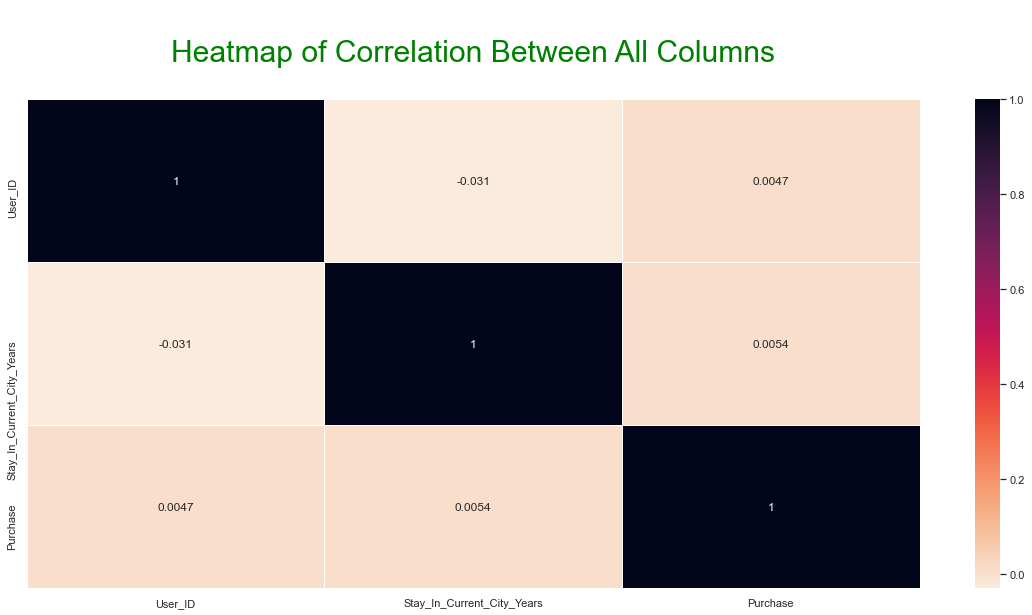

In [19]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

### 4.1 Univariate Analysis
**Understanding the distribution of data and detecting outlies for continuous variables**

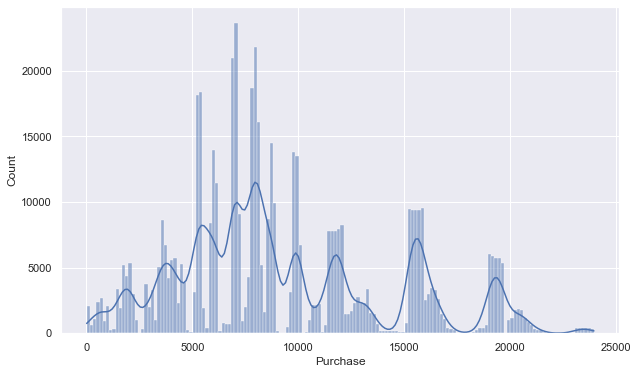

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True, palette='Set3')
plt.show()

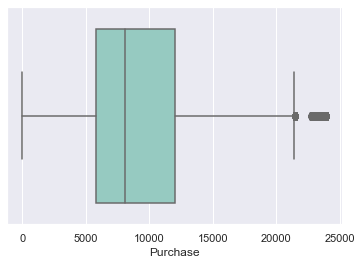

In [21]:
sns.boxplot(data=df, x='Purchase', orient='h',palette='Set3')
plt.show()

**Observation**
- Purchase is having outliers

**Understanding the distribution of data for the categorical variables**
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

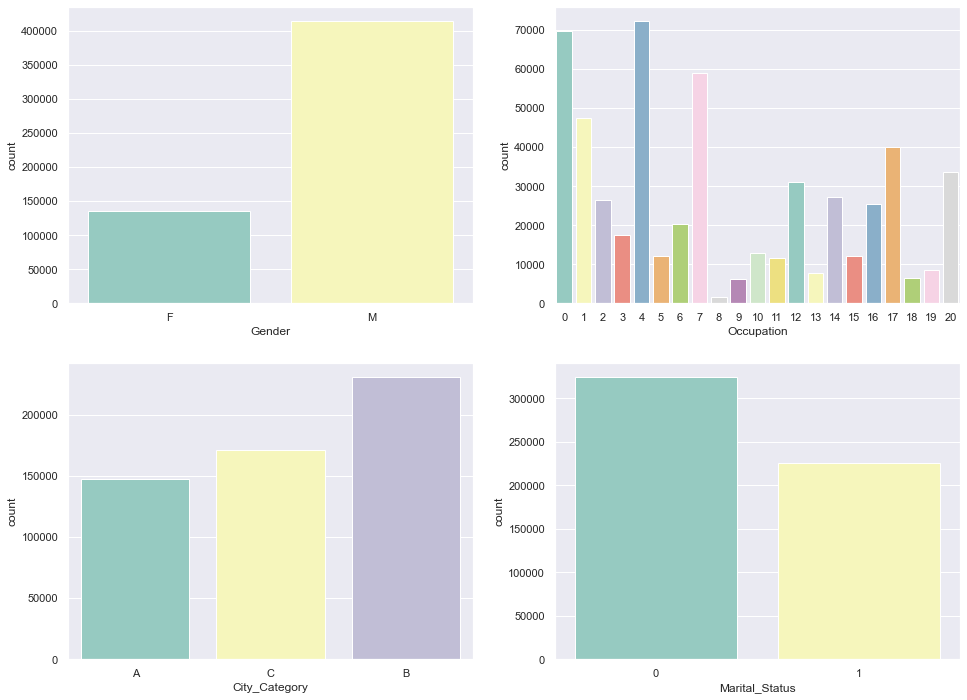

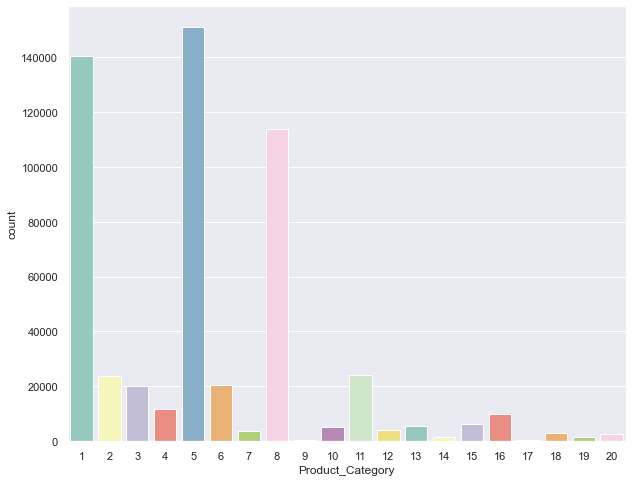

In [22]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0],palette='Set3')
sns.countplot(data=df, x='Occupation', ax=axs[0,1],palette='Set3')
sns.countplot(data=df, x='City_Category', ax=axs[1,0],palette='Set3')
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1],palette='Set3',)
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category',palette='Set3')
plt.show()

#### Observations
- Most of the users are **Male**
- There are 20 different types of **Occupation** and **Product_Category**
- More users belong to **B City_Category**
- More users are **Single** as compare to **Married**
- **Product_Category** - **1, 5, 8, & 11** have highest purchasing frequency.

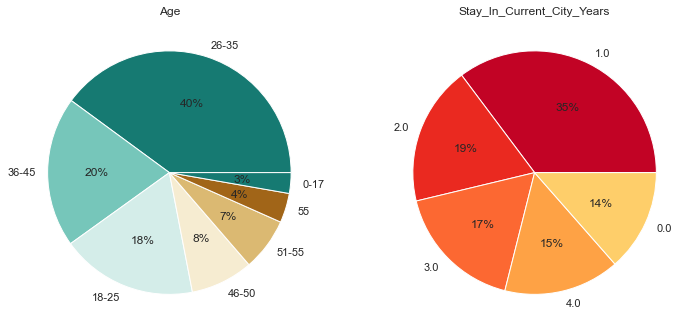

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

### 4.2 Bi-variate Analysis

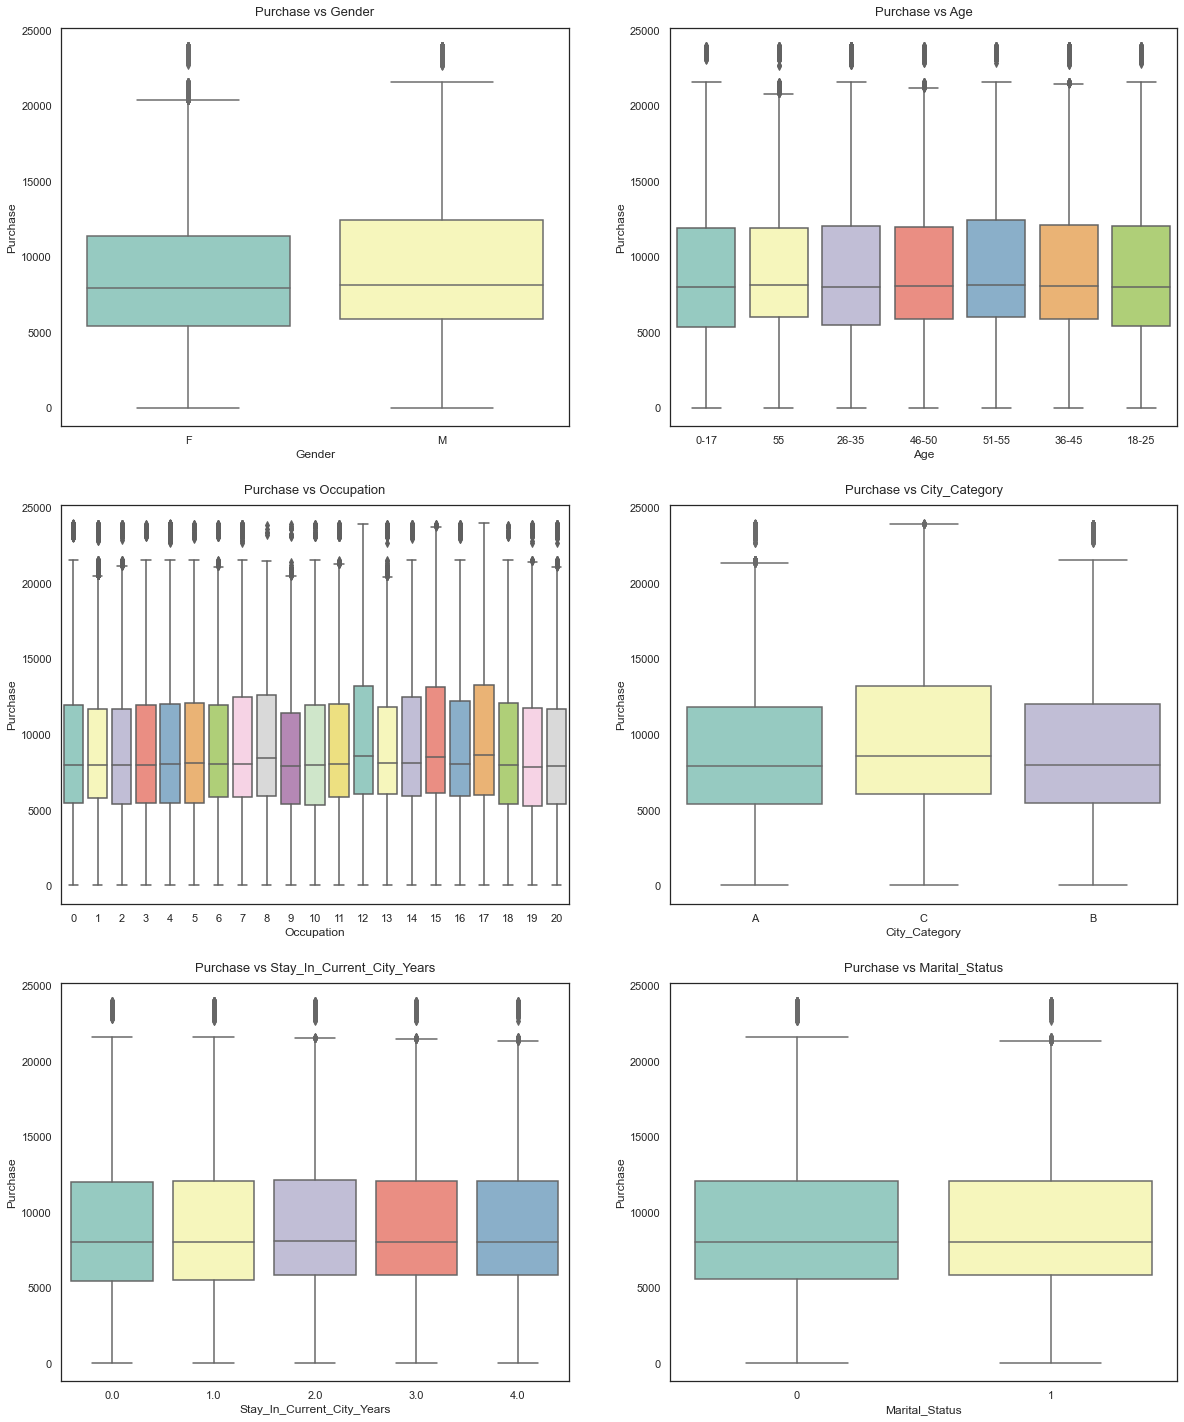

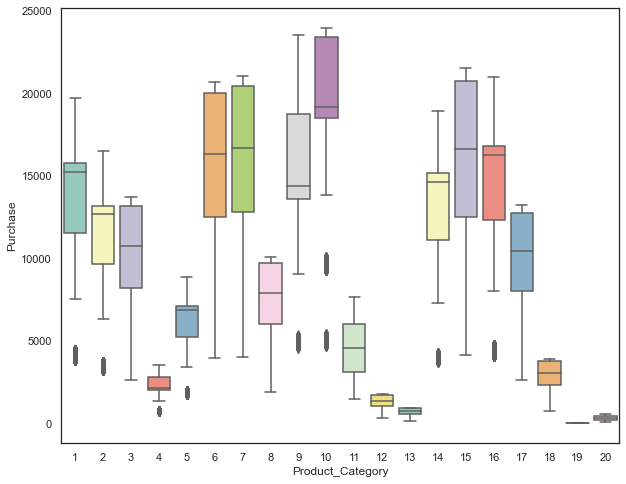

In [24]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

### 4.3 Multivariate Analysis

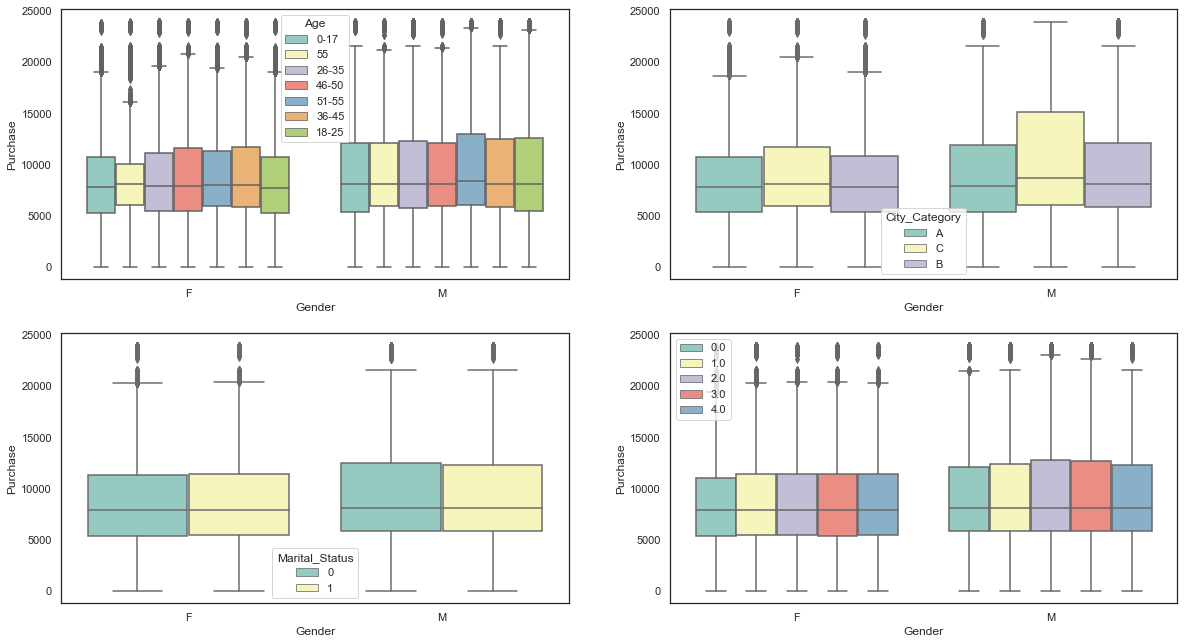

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

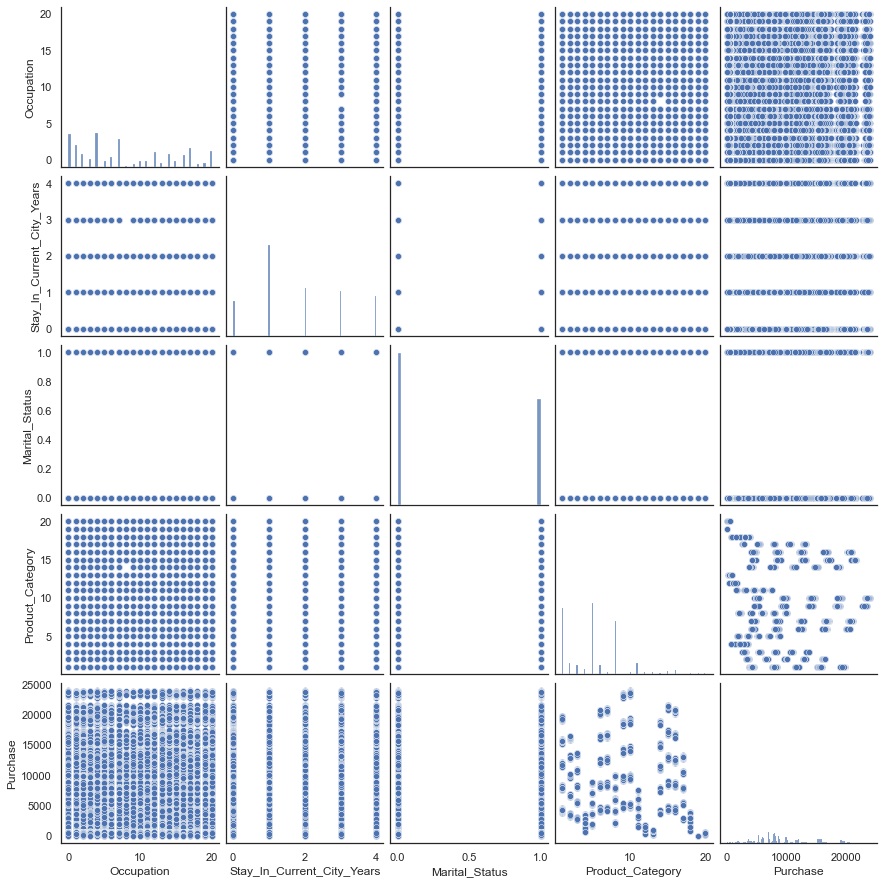

In [26]:
sns.pairplot(df[['Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category','Purchase']])
plt.show()

***
***
## **5. Confidence intervals for Male and Female spendings.**

**Average amount spend per customer for Male and Female**

In [27]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [28]:
# Gender wise value counts
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Histogram of average amount spend for each customer - Male & Female


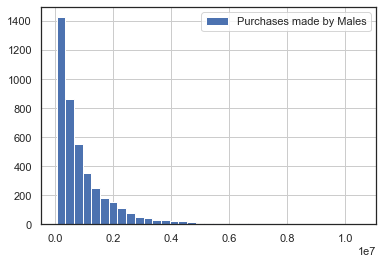

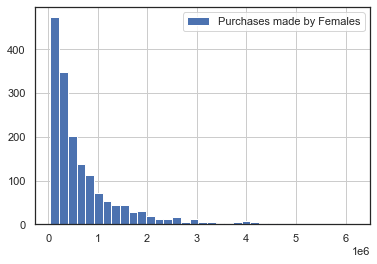

In [29]:
print('Histogram of average amount spend for each customer - Male & Female')
amt_df[amt_df['Gender']=='M']['Purchase'].hist(bins=35)
plt.legend(['Purchases made by Males'])
plt.show()
amt_df[amt_df['Gender']=='F']['Purchase'].hist(bins=35)
plt.legend(['Purchases made by Females'])
plt.show()

In [30]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


**Observation**

1. Male customers spend more money than female customers

In [31]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [32]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

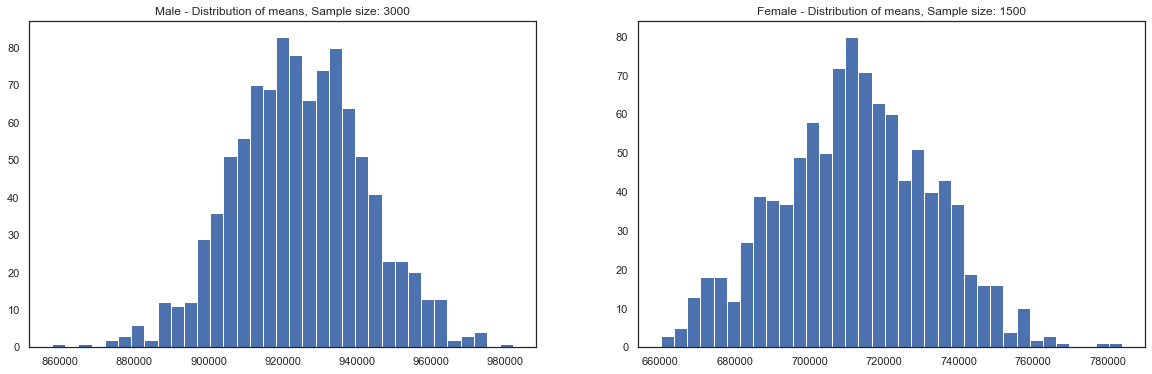

In [33]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [34]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924631.61
Population mean - Mean of sample means of amount spend for Female: 712225.33

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation**

Now using the **Central Limit Theorem** for the **population** we can say that:
1. Average amount spend by male customers is **9,85,830.10**
2. Average amount spend by female customers is **8,07,370.73**

In [35]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


In [36]:
gendermap = {'M':'Male', 'F':'Female'}
for gender in ['M', 'F']:
    data = df[df.Gender==gender]['Purchase']
    print("\nGender: ", gendermap[gender])
    m = data.mean() 
    s = data.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Gender:  Male
90.0% Confidence Interval: (9424.512468203842, 9450.539612740688)
95.0% Confidence Interval: (9422.019402055814, 9453.032678888716)
99.0% Confidence Interval: (9417.14682877079, 9457.90525217374)

Gender:  Female
90.0% Confidence Interval: (8713.287689504074, 8755.843840806878)
95.0% Confidence Interval: (8709.21132117373, 8759.92020913722)
99.0% Confidence Interval: (8701.24420611832, 8767.887324192632)


Now we can infer about the population that, **95% of the times**:

1. Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**
***
***
## **6. Confidence intervals for spendings of Married and Unmarried individuals.**    

In [37]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [38]:
amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

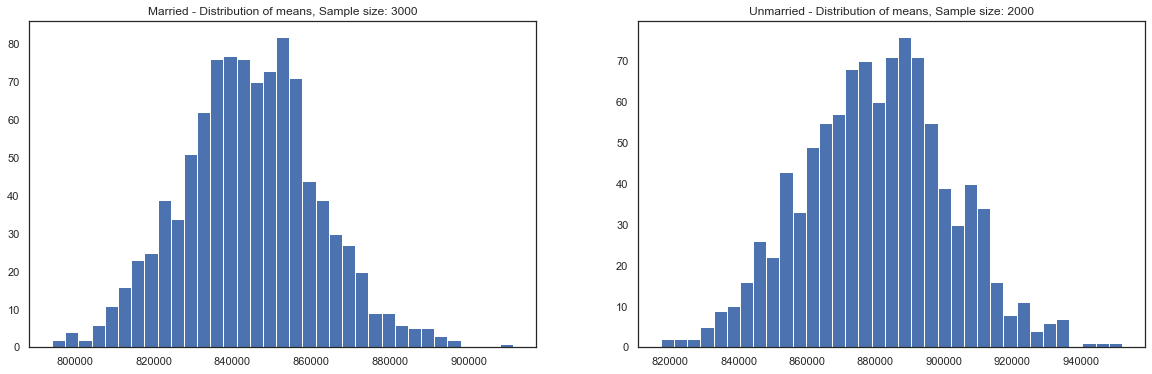

Population mean - Mean of sample means of amount spend for Married: 844381.54
Population mean - Mean of sample means of amount spend for Unmarried: 880483.02

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [39]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()
    
    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))

**Observation**

Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**

In [40]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = amt_df[amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


In [41]:
statusmap = {0:'Unmarried', 1:'Married'}
for status in [0, 1]:
    data = df[df.Marital_Status==status]['Purchase']
    print("\nMarital Status: ", statusmap[status])
    m = data.mean() 
    s = data.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Marital Status:  Unmarried
90.0% Confidence Interval: (9251.396344426079, 9280.418893416934)
95.0% Confidence Interval: (9248.616353737027, 9283.198884105987)
99.0% Confidence Interval: (9243.182995563593, 9288.63224227942)

Marital Status:  Married
90.0% Confidence Interval: (9243.79064243542, 9278.558505729326)
95.0% Confidence Interval: (9240.460315792989, 9281.888832371758)
99.0% Confidence Interval: (9233.951339733763, 9288.397808430984)


***
***
## **7. Confidence intervals for spendings of different Age groups.**

**Calculating the average amount spent by Age**

In [42]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55,90034
5889,1006039,46-50,590319


In [43]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55        372
0-17      218
Name: Age, dtype: int64

In [44]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [45]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55', '0-17']:
    
    new_df = amt_df[amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55 --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


In [46]:
ages = df['Age'].unique()
for age in ages:
    print("\nAge group: ", age)
    data = Unmarried = df[df.Age==age]['Purchase']
    m = Unmarried.mean() 
    s = Unmarried.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Age group:  0-17
90.0% Confidence Interval: (8865.049497531349, 9001.8797833586)
95.0% Confidence Interval: (8851.941436361221, 9014.987844528727)
99.0% Confidence Interval: (8826.320033768494, 9040.609247121454)

Age group:  55
90.0% Confidence Interval: (9280.065285868368, 9392.495633030441)
95.0% Confidence Interval: (9269.295063935433, 9403.265854963376)
99.0% Confidence Interval: (9248.243867862855, 9424.317051035954)

Age group:  26-35
90.0% Confidence Interval: (9235.102926382391, 9270.278339357385)
95.0% Confidence Interval: (9231.733560884022, 9273.647704855754)
99.0% Confidence Interval: (9225.148284007466, 9280.23298173231)

Age group:  46-50
90.0% Confidence Interval: (9170.406084331049, 9246.845310605606)
95.0% Confidence Interval: (9163.08393647555, 9254.167458461105)
99.0% Confidence Interval: (9148.772763375606, 9268.478631561049)

Age group:  51-55
90.0% Confidence Interval: (9492.160404787175, 9577.455657133296)
95.0% Confidence Interval: (9483.989875153999, 9585.626

***
***
## **8. Purchase behaviour in different Cities per Gender and Marital status**

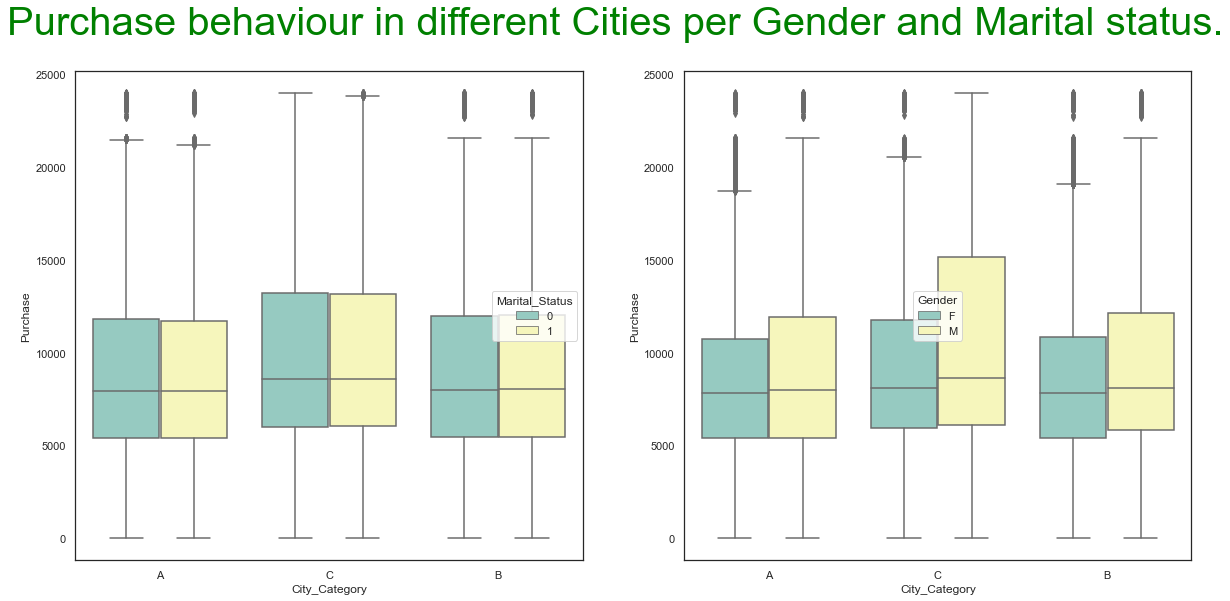

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))
fig.suptitle("Purchase behaviour in different Cities per Gender and Marital status.", fontsize=40, color="green")
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Marital_Status', ax=ax[0], palette='Set3')
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Gender', ax=ax[1], palette='Set3')
plt.show()

***
***
## **9. Purchase distribution per product categories**

<Figure size 1080x576 with 0 Axes>

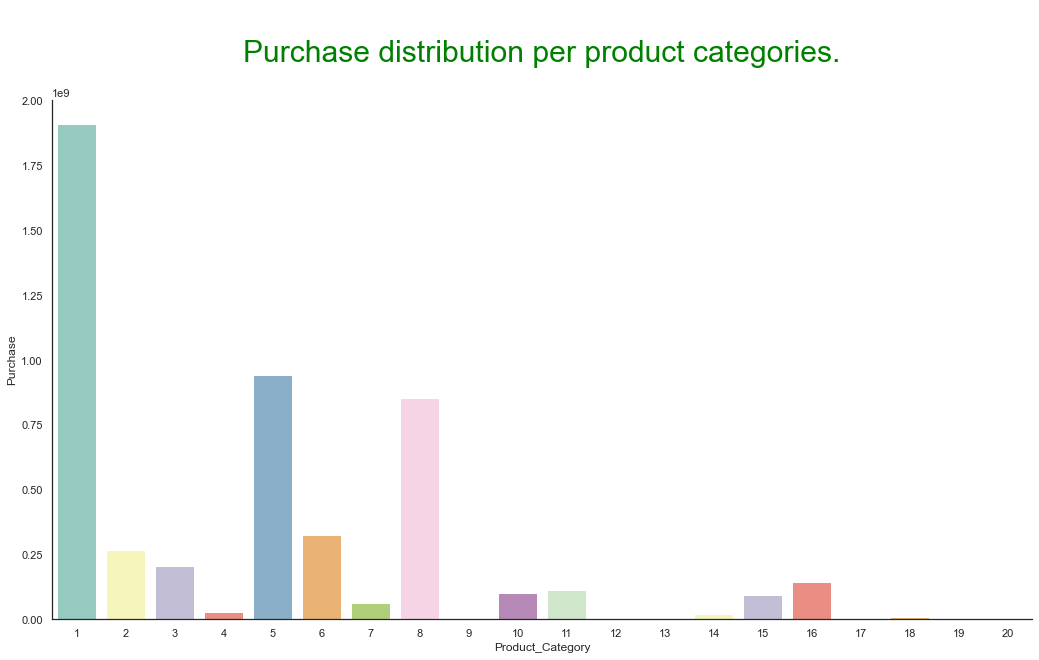

In [48]:
category_purchases = df[['Product_Category', 'Purchase']].groupby('Product_Category')['Purchase'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.catplot(x="Product_Category", y="Purchase", kind="bar", data=category_purchases, height=8, aspect=1.8, palette='Set3')
plt.title("\nPurchase distribution per product categories.\n", fontsize=30, color="green")
plt.show()

***
***
## **10. Business Insights.**
- **A.** Male customers are significantly more than Females ie 75% of the users are Male and 25% are Female.
- **B.** Buyers with age between 26 and 35 are significantly more than any other age category ie ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
- **C.** There are more buyers in City Category B than the other two City Categories.
- **D.** Buyers who have spent 1 year in the city are significantly more than the buyers who have spent 2 years, 3 years, more than 4 years and less than 1 year in the city ie 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years.
- **E.** Unmarried buyers are more in numbers than the married buyers ie 60% are single and 40% are married.
- **F.** Males in City Category C tend to spend more amount of money than all the other individual buyers.
- **G.** There are 20 product categories in total wherein 1, 5, 8, & 11 have highest purchasing frequency.
- **H.** There are 20 different types of occupation in the city.
- **I.** With 90%, 95% and even 99% of confidence level, we can see that Male buyers spend significantly more money than the Female Buyers, since there is no overlap between confidence interval.
- **J.** With 90%, 95% and even 99% of confidence level, we can see that Marital Status has no impact on spendings.
- **K.** With 90%, 95% and even 99% of confidence level, we can see that buyers aged between 0-17, significantly spend less money than the other Buyers, since there is no overlap between confidence interval.
- **L.** With 90%, 95% and even 99% of confidence level, we can see that buyers aged between 51-55, significantly spend more money than the other Buyers, since there is no overlap between confidence interval.
- **M.** Products under categories 1, 5 and 8 generate a huge amount of revenue for Walmart.

### Confidence Interval
#### Confidence Interval by Gender
Now using the **Central Limit Theorem** for the **population**:
1. Average amount spent by **male** customers is **9,85,830.10**
2. Average amount spent by **female** customers is **8,07,370.73**

Now we can infer about the population that, **95% of the times**:

1. Average amount spent by **male** customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spent by **female** customer will lie in between: **(673254.77, 750794.02)**


#### Confidence Interval by Marital_Status
1. **Married** confidence interval of means: **(806668.83, 880384.76)**
2. **Unmarried** confidence interval of means: **(848741.18, 912410.38)**


#### Confidence Interval by Age

1. For **age 26-35** --> confidence interval of means: **(945034.42, 1034284.21)**
2. For **age 36-45** --> confidence interval of means: **(823347.80, 935983.62)**
3. For **age 18-25** --> confidence interval of means: **(801632.78, 908093.46)**
4. For **age 46-50** --> confidence interval of means: **(713505.63, 871591.93)**
5. For **age 51-55** --> confidence interval of means: **(692392.43, 834009.42)**
6. For **age 55+** --> confidence interval of means: **(476948.26, 602446.23)**
7. For **age 0-17** --> confidence interval of means: **(527662.46, 710073.17)**


***
***
## **11. Recommendations.**
- **A.** Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
- **B.** Could probably create an additional offer for female buyers, so that the no.of potential female buyers would increase and hence the average spend would also increase for female buyers.
- **C.** **Product_Category - 1, 5, 8, & 11** have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
- **D.** The Average spending of married and unmarried are too close to each other. So, the differentiation between them is very low. Hence, an equal approach to target married and unmarried customers would be advised. Both couple-type products and other products will get sold based on the data given.
- **E.** **Unmarried** customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
- **F.** Customers in the **age 18-45** spend more money than the others, So company should focus on acquisition of customers who are in the **age 18-45**
- **G.** Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
- **H.** Walmart should invest in advertisements for expensive products to target male buyers in city category C.
- **I.** Walmart should collaborate with celebrities to promote male products.
- **J.** Walmart should invest in targeted advertisements for individual buyers aged between 51-55.
- **K.** Walmart should engage in different marketing campaigns to target individual buyers in city category B.
- **L.** Walmart should invest in ad campaigns to boost sells of products categorized under 1, 5 and 8 product categories.